# MSP - 2. projekt 

Jakub Kuzník (xkuzni04@stud.fit.vutbr.cz)  
Statistika a pravděpodobnost (MSP)  
FIT VUT, 2023/2024  


In [49]:
# Import knihoven
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.optimize import minimize

## Bayesovské odhady - úloha 1

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).

O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení. 

Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou uvedené v souboru measurements.csv ve sĺoupci „úloha_1 a)“.

Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete apriorní a aposteriorní prediktivní rozdělení pozorovaní. 

1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova rozdělení 𝜆.

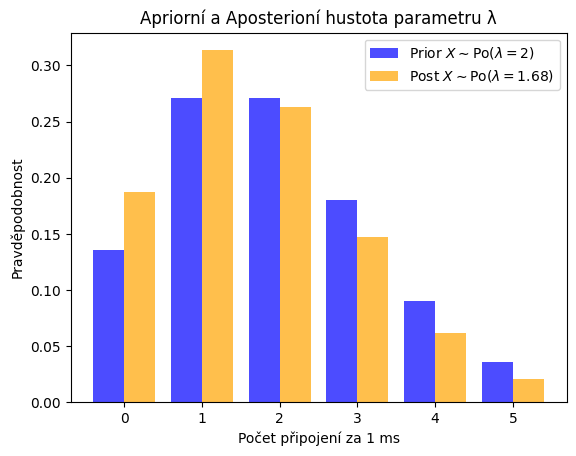

In [81]:
# zvolme si lambdu 
l = 10 / 5
# Alfa je počet výskytů 
# Beta je počet záznamů 
alfa=10
beta=5 

# Vygenerujme rozumně velké pole hodnot osy x 
x_axis = np.arange(0, 6)

# hustota pravědepodobnosti 
hustota_pst_prior = poisson.pmf(x_axis, l)

# Na základě našich dat aktualizujeme apriorni pravděpodobnost na posteriorní pravděpodobnost 
data_uloha1 = pd.read_csv('1-measurements.csv')
pozorovani = data_uloha1['uloha_1 a)'].dropna().tolist()

# Aktualizace apriorní pravděpodobnosti na aposteriorní pravděpodobnost
alfa_posterior = alfa + np.sum(pozorovani)
beta_posterior = beta + len(pozorovani)
# nova lambda 
l_posterior = alfa_posterior / beta_posterior

# Vykreslení aposteriorní pravděpodobnosti
x_posterior = np.linspace(0, 20, 1000)

# hustota pravědepodobnosti 
hustota_pst_posterior = poisson.pmf(x_posterior, l_posterior)


# Vykreslení grafů
# Vykreslení apriorní a aposteriorní pravděpodobnosti na jednom grafu s různými barvami
plt.bar(x_axis - 0.2, hustota_pst_prior, width=0.4, color='blue', align='center', alpha=0.7, label=r'Prior $X \sim \mathrm{Po}(\lambda=2)$')
plt.bar(x_axis + 0.2, poisson.pmf(x_axis, l_posterior), width=0.4, color='orange', align='center', alpha=0.7, label=fr'Post $X \sim \mathrm{{Po}}(\lambda={l_posterior:.2f})$')

plt.title('Apriorní a Aposterioní hustota parametru λ')
plt.xlabel('Počet připojení za 1 ms')
plt.ylabel('Pravděpodobnost')
plt.legend()
plt.show()

2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní 𝑥 za jeden časový interval.

3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního rozdělení a porovnejte je.

4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte jejich výběr.




5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je. 

### b) Aproximace diskrétním rozdělením

Integrál ve jmenovateli Bayesově větě je ve většině praktických aplikací důvodem, proč nejsme schopní odvodit aposteriorní hustotu analyticky. Jeden ze způsobů, jak překonat tento problém a odhadnout parametru (ne vektor parametrů) je, že zvolíme diskrétní aproximaci a neřešitelný integrál přejde na sumu.

Poznámka:
Nyní řešíme odhad aposteriorní hustoty a paramertů v případě, že apriorní informace (hustota) je ve formě naměřených hodnot (sloupec „uloha_1 b)_prior“) a rozdělení procesu, který sledujete, je také ve tvaru naměřených hodnot (sloupec „uloha_1 b)_pozorovania“). Tedy místo zadání dvou hustot máme naměřené hodnoty a s pomocí tříděného statistického souboru odhadneme hustoty. Pak se plocha pod hustotou spočítá součtem četností (obdoba numerického počítání integrálu obdélníkovou metodou).

Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení (truncated normal distribution) s parametry
𝜇 = 3, 𝜎
2 = 1, 𝑎 = 1

Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci „skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏.

Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její diskrétní aproximace) a následně diskrétní aposteriorní hustotu.

1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.

3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

## Regrese - úloha 2

Disclaimer: data (včetně „příběhu“) jsou vygenerovaná a nemusí mít dobrý obraz v realitě. Berte proto prosím výsledky z regrese s „rezervou“. Díky.

Podařilo se Vám pomocí stroje času vrátit do doby „zlatého věku“ sociálních sítí a rozhodli jste se konkurovat Facebooku a Twitteru. V souboru Data_v1.0.csv máte k dispozici záznamy od více než 500 uživatelů o rychlosti odezvy (sloupec ping [ms]) během používání Vaší aplikace. Ke každému zápisu máte navíc k dispozici o počtu uživatelů (sloupec ActiveUsers) v daném okamžiku, o procentu uživatelů, kteří momentálně interagují s prezentovaným obsahem (sloupec InteractingPct), o procentu uživatelů, kteří jen tupě scrollují po Vaší obdobě timeline/twitterfeedu (sloupec ScrollingPct) a o operačním systému zařízení ze kterého se uživatel připojil (OSType).

1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).
- Zapište rovnici Vašeho finálního modelu.
- Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.
- Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.

2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má
odezva nejproblematičtější hodnotu.

3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních
parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.

4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.